In [2]:
import urllib.request
import matplotlib as plt
import pandas as pd
import requests
import seaborn
import glob
import statsmodels.api as sm
from datetime import date
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#list_of_companies = ['AXISBANK','BANKBARODA','CORPBANK','HDFCBANK',
 #                    'ICICIBANK','INDUSINDBK','J&KBANK','KOTAKBANK','PNB','SBIN']

In [4]:
sectors = ['banks','fmcg','pharma','housing']
all_pairs = []
all_pairs_ct =[]

In [5]:
def cointegration_test_ct(y, x):
    # Step 1: regress on variable on the other
    ols_result = sm.OLS(y, x).fit()
    return sm.tsa.stattools.adfuller(ols_result.resid,regression  = 'ct'),ols_result.resid

In [6]:
def cointegration_test(y, x):
    # Step 1: regress on variable on the other
    ols_result = sm.OLS(y, x).fit()
    return sm.tsa.stattools.adfuller(ols_result.resid),ols_result.resid

In [7]:
for name in sectors:
    list_of_companies = glob.glob(name+'/*.csv')
    print(list_of_companies)

['banks\\AXISBANK.csv', 'banks\\BANKBARODA.csv', 'banks\\CORPBANK.csv', 'banks\\HDFCBANK.csv', 'banks\\ICICIBANK.csv', 'banks\\INDUSINDBK.csv', 'banks\\J&KBANK.csv', 'banks\\KOTAKBANK.csv', 'banks\\PNB.csv', 'banks\\SBIN.csv']
['fmcg\\COLPAL.csv', 'fmcg\\DABUR.csv', 'fmcg\\GILLETTE.csv', 'fmcg\\GODREJCP.csv', 'fmcg\\GODREJIND.csv', 'fmcg\\GSKCONS.csv', 'fmcg\\HINDUNILVR.csv', 'fmcg\\ITC.csv', 'fmcg\\MARICO.csv', 'fmcg\\NESTLEIND.csv', 'fmcg\\PGHH.csv', 'fmcg\\UBL.csv', 'fmcg\\UNITDSPR.csv']
['pharma\\ABBOTINDIA.BO.csv', 'pharma\\APLLTD.csv', 'pharma\\AUROPHARMA.csv', 'pharma\\DRREDDY.csv', 'pharma\\GLAXO.csv', 'pharma\\HESTERBIO.csv', 'pharma\\IPCALAB.csv', 'pharma\\LUPIN.csv', 'pharma\\PFIZER.csv', 'pharma\\PGHH.csv', 'pharma\\SANOFI.csv', 'pharma\\SUNPHARMA.csv', 'pharma\\TORNTPHARM.csv']
['housing\\CANFINHOME.csv', 'housing\\GICHSGFIN.csv', 'housing\\HDFC.csv', 'housing\\IBULHSGFIN.csv', 'housing\\LICHSGFIN.csv', 'housing\\REPCOHOME.csv']


In [8]:
#CHECKING wihtout ct
for name in sectors:
    list_of_companies = glob.glob(name+'/*.csv')
    n = len(list_of_companies)
    pvalue_matrix = np.ones((n, n))
    pairs = []
    for i in range(n):
        print(i)
        data1 = (pd.read_csv(list_of_companies[i])).interpolate(axis=0)
        for j in range(i+1, n):
            print(j)
            data2 = (pd.read_csv(list_of_companies[j])).interpolate(axis=0)
            set1 = (data1['Adj Close'])
            set2 = (data2['Adj Close'])
            value1 = cointegration_test(set1,set2)[0][1]
            value2 = cointegration_test(set2,set1)[0][1]
            #pvalue_matrix[i, j] = pvalue
            if value2 < 0.05 and value1 < 0.05:
                print(value1)
                print(value2)
                pairs.append((list_of_companies[i], list_of_companies[j]))
    print(pairs)
    print(len(pairs))
    all_pairs.append(pairs)

0
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
2
3
4
5
6
0.00039223042041627116
0.00048251225441444344
7
8
0.018118494519053778
0.01755134890126724
9
3
4
5
6
7
0.019401575793388186
0.01913027360553527
8
9
4
5
6
7
8
9
5
6
7
8
9
6
7
8
0.002726247798422946
0.0022427718342043035
9
7
8
9
8
9
9
[('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\PNB.csv'), ('banks\\HDFCBANK.csv', 'banks\\KOTAKBANK.csv'), ('banks\\J&KBANK.csv', 'banks\\PNB.csv')]
4
0
1
0.03903530084640736
0.042348418126083386
2
3
4
5
0.009273293768822952
0.008904999737639452
6
7
8
9
10
0.04266405045167459
0.04823284456496234
11
12
1
2
0.04224406651535361
0.045557139224097654
3
4
5
6
7
8
9
10
0.0016301119035984474
0.0018033318121731627
11
0.014625946398815624
0.0129313022581906
12
2
3
4
5
6
7
8
9
10
0.04653364267401355
0.04528758131941682
11
12
3
4
5
6
7
8
9
10
11
12
4
5
6
7
8
9
10
11
12
5
6
7
8
9
10
11
0.017061507876573883
0.017649699414233017
12
6
7
8
9
10
11
12
7
8
9
10
11
12
8
9
10
11
12
9
10
11
12
10
11

In [9]:
def plot_z_score(zscore):
    plt.figure.Figure(figsize=(15,7))
    zscore.plot()
    plt.pyplot.axhline(0, color='black')
    plt.pyplot.axhline(1.0, color='red', linestyle='--')
    plt.pyplot.axhline(-1.0, color='green', linestyle='--')
    plt.pyplot.axhline(0.5, color='yellow', linestyle='--')
    plt.pyplot.axhline(-0.5, color='yellow', linestyle='--')
    plt.pyplot.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
    plt.pyplot.show()


In [10]:
#CHECKING WITTH CT
for name in sectors:
    list_of_companies = glob.glob(name+'/*.csv')
    n = len(list_of_companies)
    pvalue_matrix = np.ones((n, n))
    pairs_ct = []
    for i in range(n):
        print(i)
        data1 = (pd.read_csv(list_of_companies[i])).interpolate(axis=0)
        for j in range(i+1, n):
            print(j)
            data2 = (pd.read_csv(list_of_companies[j])).interpolate(axis=0)
            set1 = (data1['Close'])
            set2 = (data2['Close'])
            value1 = cointegration_test_ct(set1,set2)[0][1]
            value2 = cointegration_test_ct(set2,set1)[0][1]
            if value2 < 0.05 and value1 < 0.05:
                print(value1)
                print(value2)
                pairs_ct.append((list_of_companies[i], list_of_companies[j]))
    print(pairs_ct)
    print(len(pairs_ct))
    all_pairs_ct.append(pairs_ct)

0
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
2
3
4
5
6
0.036080364169439105
0.03830488826452757
7
8
9
0.026057527129424916
0.016519302575223705
3
4
5
6
7
8
9
0.033262130250576886
0.0361301297907618
4
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
0.04474711532823138
0.03930487246125076
8
9
9
[('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\SBIN.csv'), ('banks\\HDFCBANK.csv', 'banks\\SBIN.csv'), ('banks\\KOTAKBANK.csv', 'banks\\SBIN.csv')]
4
0
1
0.02213004955306445
0.021722058722547344
2
3
4
5
0.030462500762804195
0.031111143068639022
6
7
8
9
10
0.008577802496239576
0.008240948590307239
11
12
0.016341090712495572
0.017213808394554872
1
2
3
4
5
0.0066032548325816905
0.007347854242675816
6
7
8
9
10
0.005269419534956947
0.005286614075354172
11
0.01126750978008372
0.011987049922976898
12
0.023283870225225253
0.026446179344261186
2
3
4
5
6
7
8
9
10
11
12
0.00034260413228142907
0.0005353108724645894
3
4
5
6
7
0.021996308758185076
0.019384096389531532
8
9
10
11
12
4
5
6
7
8
9
10
11


In [15]:
def optimal_window(name1,name2):
    main = []
    data1 = (pd.read_csv(name1)).interpolate(axis=0)
    data2 = (pd.read_csv(name2)).interpolate(axis=0)
    for f in range(3,25):
        row =  [trade(data1['Close'][:-300],data2['Close'][:-300],f,s) for s in range(35,200)] 
        main.append(row)
    scores = np.array(main)
    windows = np.unravel_index(np.argmax(scores),shape=(22,165))
    print(np.argmax(scores))
    print(windows)
    print('training' + str(scores[windows[0],windows[1]]))
    plt.figure.Figure(figsize=(25,25))
    seaborn.heatmap(scores)
    return windows

In [16]:
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    #zscore = zscore[]
    # Simulate trading
    # Start with no money and no positions
    money = 10000
    returns = []
    countS1 = 0
    countS2 = 0
    for i in zscore.index:
        # Sell short if the z-score is > 1
        if zscore[i] > 1 and (countS1==0) and (countS2==0) :
            countS1 = -(money/2)/S1[i]
            countS2 = (money/2)/S2[i]
            #print(S1[i])
            #print(S2[i])
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
            #print('Selling Ratio %s %s %s %s %s'%(money, ratios[i], countS1,countS2,zscore[i]))
        # Buy long if the z-score is < 1
        elif zscore[i] < -1 and (countS1==0) and (countS2==0):
            countS1 = (money/2)/S1[i]
            countS2 = -(money/2)/S2[i]
            #print(S1[i])
            #print(S2[i])
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
            #print('Buying Ratio %s %s %s %s %s'%(money,ratios[i], countS1,countS2,zscore[i]))
        # Clear positions if the z-score between -.5 and .5
        #elif abs(zscore[i]) < 1:
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            #print(S1[i])
            #print(S2[i])
            #returns.append(money)
            
            
            #print('Exit pos %s %s %s %s %s'%(money,ratios[i], countS1,countS2,zscore[i]))
            
            
    return money

In [21]:
def trade1(name1, name2,window):
    S1 = ((pd.read_csv(name1)).interpolate(axis=0))['Adj Close'][-300:]
    S2 = (pd.read_csv(name2)).interpolate(axis=0)['Adj Close'][-300:]
    window1 = window[0] + 3
    window2 = window[1] + 35
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    #zscore = zscore[]
    # Simulate trading
    # Start with no money and no positions
    money = 10000
    returns = []
    countS1 = 0
    countS2 = 0
    for i in zscore.index:
        # Sell short if the z-score is > 1
        if zscore[i] > 1 and (countS1==0) and (countS2==0) :
            countS1 = -(money/2)/S1[i]
            countS2 = (money/2)/S2[i]
            print(S1[i])
            print(S2[i])
            print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
            #print('Selling Ratio %s %s %s %s %s'%(money, ratios[i], countS1,countS2,zscore[i]))
        # Buy long if the z-score is < 1
        elif zscore[i] < -1 and (countS1==0) and (countS2==0):
            countS1 = (money/2)/S1[i]
            countS2 = -(money/2)/S2[i]
            print(S1[i])
            print(S2[i])
            print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        #elif abs(zscore[i]) < 1:
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            print(S1[i])
            print(S2[i])
            returns.append(money)
            
          
    print('test' + str(returns[-1]))
    return pd.Series(returns)

In [22]:
print(all_pairs)
print(all_pairs_ct)

[[('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\PNB.csv'), ('banks\\HDFCBANK.csv', 'banks\\KOTAKBANK.csv'), ('banks\\J&KBANK.csv', 'banks\\PNB.csv')], [('fmcg\\COLPAL.csv', 'fmcg\\DABUR.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\GSKCONS.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\PGHH.csv'), ('fmcg\\DABUR.csv', 'fmcg\\GILLETTE.csv'), ('fmcg\\DABUR.csv', 'fmcg\\PGHH.csv'), ('fmcg\\DABUR.csv', 'fmcg\\UBL.csv'), ('fmcg\\GILLETTE.csv', 'fmcg\\PGHH.csv'), ('fmcg\\GSKCONS.csv', 'fmcg\\UBL.csv')], [('pharma\\APLLTD.csv', 'pharma\\AUROPHARMA.csv'), ('pharma\\APLLTD.csv', 'pharma\\GLAXO.csv')], []]
[[('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\SBIN.csv'), ('banks\\HDFCBANK.csv', 'banks\\SBIN.csv'), ('banks\\KOTAKBANK.csv', 'banks\\SBIN.csv')], [('fmcg\\COLPAL.csv', 'fmcg\\DABUR.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\GSKCONS.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\PGHH.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\UNITDSPR.csv'), ('fmcg\\DABUR.csv', 'fmcg\\GSKCONS.

In [23]:
def plotter(name1, name2,window):
    trades = 0
    S1 = ((pd.read_csv(name1)).interpolate(axis=0))['Adj Close']
    S2 = (pd.read_csv(name2)).interpolate(axis=0)['Adj Close']
    window1 = window[0]
    window2 = window[1]
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    plot_z_score(zscore)

In [25]:
windows = []
for pairs in all_pairs:
    for i in pairs:
        print(i)
        window_1 = optimal_window(i[0],i[1])
        print('----')
        trade1(i[0],i[1],window_1)
        windows.append(window_1)

('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv')


KeyboardInterrupt: 

In [ ]:
for pairs in all_pairs:
    for i in pairs:
        plotter(i[0],i[1],windows[i])

In [ ]:
for pairs_ct in all_pairs_ct:
    for i in pairs_ct:
        print(i)
        window_1 = optimal_window(i[0],i[1])
        print('----')
        trade1(i[0],i[1],window_1)
        plotter(i[0],i[1],window_1)

In [ ]:
print(all_pairs_ct[0])
i = all_pairs_ct[0][3]
print(i)
#window_1 = optimal_window(i[0],i[1])
print('----')
trade1(i[0],i[1],(5,129))

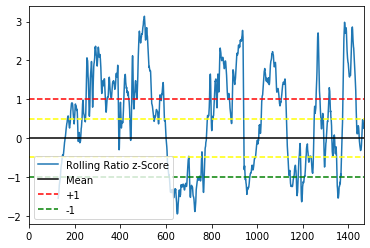

In [83]:
plotter(i[0],i[1],(5,129))